# Load Dataset

In [ ]:
import sys
import os
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# from google.colab import drive
dataset_path = drive.mount(r'/content/drive/')

Mounted at /content/drive/


In [ ]:
# Membuat dan mendefinisikan variabel dataset
train_dir = '/content/drive/MyDrive/Fruitdataset'
test_dir = '/content/drive/MyDrive/test'

# Mengecek folder Batik
print(os.listdir(train_dir))
print(os.listdir(test_dir))

['rottenapples', 'freshapples', 'freshtamto', 'freshbanana', 'freshpatato', 'freshokra', 'freshcucumber', 'rottenbanana', 'rottenpatato', 'rottencucumber', 'rottentamto', 'rottenokra']
['rottencucumber', 'freshtamto', 'rottenapples', 'freshbanana', 'freshpatato', 'rottenbanana', 'freshapples', 'freshokra', 'freshcucumber', 'rottenokra', 'rottenpatato', 'rottentamto']


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(train_dir):
    counting = len(os.listdir(os.path.join(train_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files Dataset Gambar : " + str(total_files))

Total Files Dataset Gambar : 8196


In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(test_dir):
    counting = len(os.listdir(os.path.join(test_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files Dataset Gambar : " + str(total_files))

Total Files Dataset Gambar : 4050


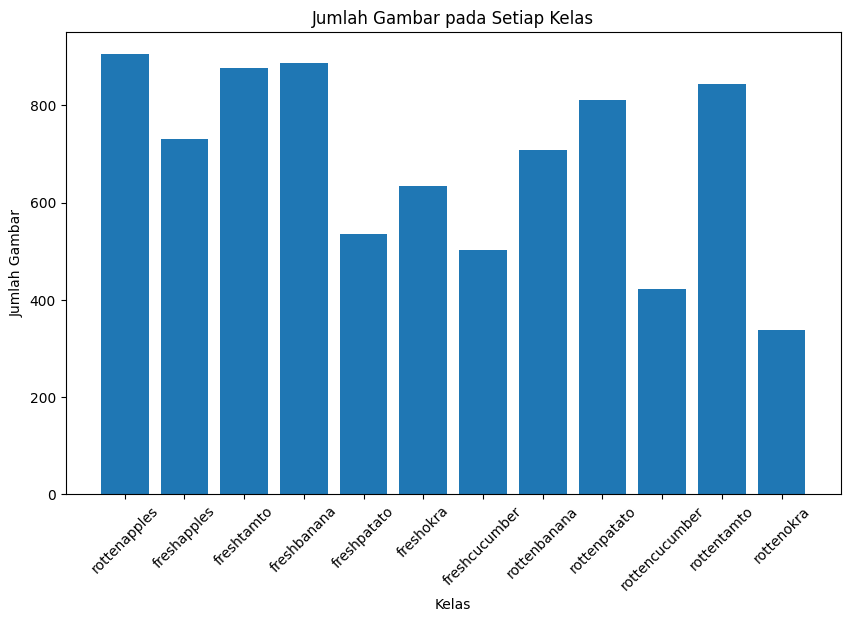

In [ ]:
import os
import matplotlib.pyplot as plt

# Fungsi untuk menghitung jumlah gambar dalam setiap kelas
def count_images_in_folders(root_dir):
    class_counts = {}
    classes = os.listdir(root_dir)
    for class_name in classes:
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            image_names = os.listdir(class_dir)
            class_counts[class_name] = len(image_names)
    return class_counts

class_counts = count_images_in_folders(train_dir)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Jumlah Gambar pada Setiap Kelas')
plt.xticks(rotation=45)
plt.show()

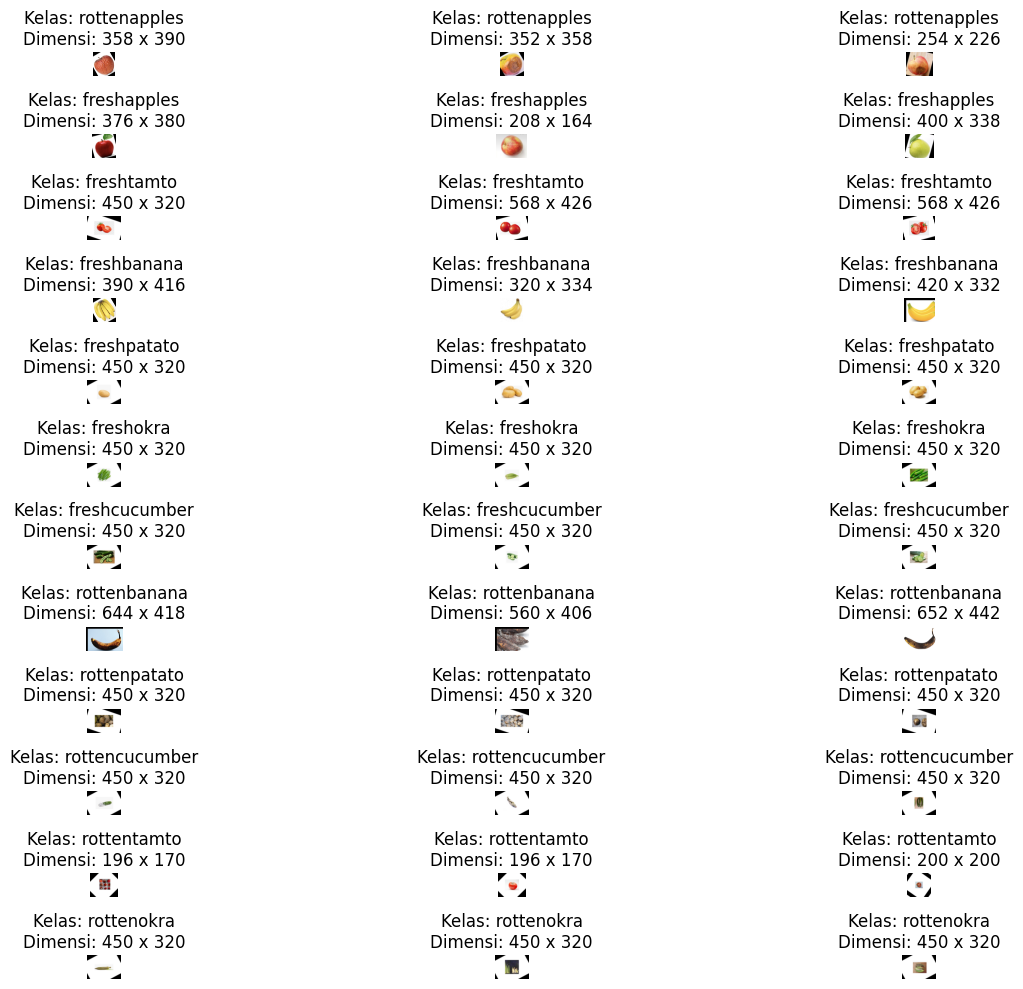

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Mengecek beberapa gambar saja per kelas
num_images_to_check = 3

# Membuat list untuk menyimpan informasi tentang dimensi gambar
image_info_list = []

# Ambil nama kelas dalam dataset
class_names = os.listdir(train_dir)

# Loop untuk memilih beberapa gambar dari setiap kelas
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        image_files = os.listdir(class_path)
        random.shuffle(image_files)  # Acak urutan gambar
        for image_file in image_files[:num_images_to_check]:
            image_path = os.path.join(class_path, image_file)
            image = Image.open(image_path)
            width, height = image.size
            image_info_list.append((class_name, image_path, width, height))

# Menampilkan informasi tentang beberapa gambar dari kelas yang berbeda
plt.figure(figsize=(15, 10))
for i, (class_name, image_path, width, height) in enumerate(image_info_list):
    plt.subplot(len(class_names), num_images_to_check, i + 1)
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Kelas: {class_name}\nDimensi: {width} x {height}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Preprocessing

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [ ]:
import os
import shutil

def split_dataset(root_dir, train_dir, val_dir, train_ratio, val_ratio):
    classes = os.listdir(root_dir)
    for class_name in classes:
        class_dir = os.path.join(root_dir, class_name)
        if os.path.isdir(class_dir):
            image_names = os.listdir(class_dir)
            num_images = len(image_names)
            train_split = int(train_ratio * num_images)
            val_split = int(val_ratio * num_images)

            train_images = image_names[:train_split]
            val_images = image_names[train_split:train_split + val_split]

            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

            for image in train_images:
                src = os.path.join(class_dir, image)
                dest = os.path.join(train_dir, class_name, image)
                shutil.copy(src, dest)

            for image in val_images:
                src = os.path.join(class_dir, image)
                dest = os.path.join(val_dir, class_name, image)
                shutil.copy(src, dest)

In [ ]:
root_dir = '/content/drive/MyDrive/Fruitdataset'  # Direktori utama dataset
train_dir = '/content/drive/MyDrive/fruit_dataset/train'  # Direktori untuk training set
val_dir = '/content/drive/MyDrive/fruit_dataset/val'  # Direktori untuk validation set
test_dir = '/content/drive/MyDrive/test'
train_ratio = 0.8  # Proporsi data training
val_ratio = 0.2  # Proporsi data validation

split_dataset(root_dir, train_dir, val_dir, train_ratio, val_ratio)

In [ ]:
# Fungsi untuk menghitung jumlah gambar dalam suatu folder
def count_images_in_folder(folder_path):
    total_images = 0
    classes = os.listdir(folder_path)
    for class_name in classes:
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            total_images += len(images)
    return total_images

# Menghitung jumlah gambar dalam setiap data train, validation
train_count = count_images_in_folder(train_dir)
val_count = count_images_in_folder(val_dir)

# Menampilkan hasil
print("Jumlah gambar dalam data train:", train_count)
print("Jumlah gambar dalam data validation:", val_count)

Jumlah gambar dalam data train: 6550
Jumlah gambar dalam data validation: 1635


In [ ]:
# Pengaturan ukuran gambar
nb_batch_size = 32
nb_epochs = 30
img_height, img_width = 128, 128

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi dan Rescale untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

# Rescale saja untuk data pengujian dan validasi
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Pembagian data latih, data pengujian, dan data validasi
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=nb_batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=nb_batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=nb_batch_size,
    class_mode='categorical',
    shuffle=False  # Hindari perubahan urutan untuk evaluasi akhir
)


Found 6550 images belonging to 12 classes.
Found 1635 images belonging to 12 classes.
Found 4050 images belonging to 12 classes.


In [ ]:
print("Jumlah Data Validation :", validation_generator.class_indices)
print("Panjang Data Validation :", len(validation_generator.class_indices))

Jumlah Data Validation : {'freshapples': 0, 'freshbanana': 1, 'freshcucumber': 2, 'freshokra': 3, 'freshpatato': 4, 'freshtamto': 5, 'rottenapples': 6, 'rottenbanana': 7, 'rottencucumber': 8, 'rottenokra': 9, 'rottenpatato': 10, 'rottentamto': 11}
Panjang Data Validation : 12


# Augmentasi

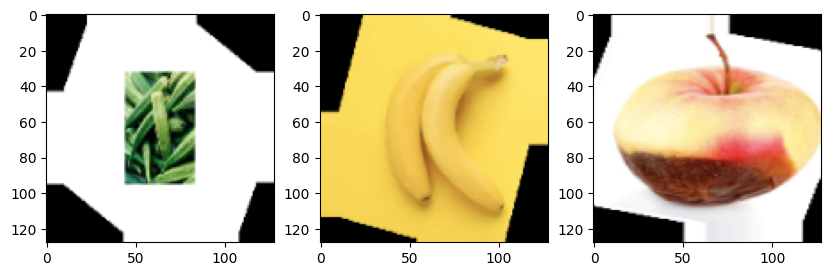

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import os
import matplotlib.pyplot as plt

# Tentukan path direktori data latih
data_latih_dir = '/content/drive/MyDrive/fruit_dataset/train'

# Menampilkan beberapa hasil augmentasi dari data train
jumlah_sampel_augmentasi = 3
plt.figure(figsize=(10, 16))
for i in range(jumlah_sampel_augmentasi):
    batch = train_generator.next()
    img = array_to_img(batch[0][0])
    plt.subplot(3, 3, i+1)
    plt.imshow(img)

plt.show()

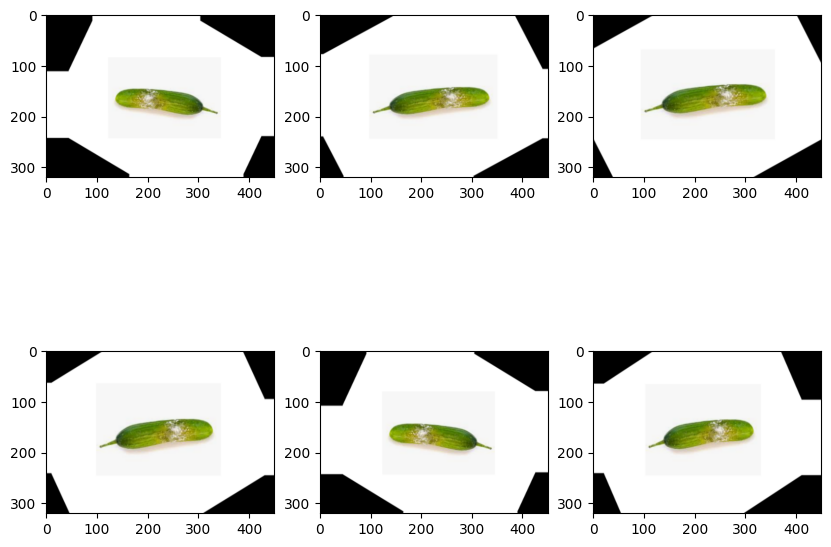

In [ ]:
# Path gambar yang ingin di-augmentasi
gambar_path = '/content/drive/MyDrive/fruit_dataset/train/rottencucumber/c_r006.png'

# Load gambar menjadi array
img = load_img(gambar_path)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate augmentasi gambar
jumlah_sampel_augmentasi = 6
i = 0
plt.figure(figsize=(10, 8))
for batch in train_datagen.flow(x, batch_size=1):
    plt.subplot(2, 3, i+1)
    img_plot = array_to_img(batch[0])
    plt.imshow(img_plot)
    i += 1
    if i >= jumlah_sampel_augmentasi:
        break

plt.show()

# Modelling

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Muat model ResNet50 terlatih (tidak termasuk lapisan atas)
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Bekukan layer model dasar
for layer in base_model.layers:
    layer.trainable = False

94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
# Tambah lapisan atas khusus untuk klasifikasi
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dropout(0.25)(x)

jumlah_kelas = len(validation_generator.class_indices)
predictions = keras.layers.Dense(jumlah_kelas, activation='softmax')(x)

# model akhir
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Tampilkan ringkasan model
model.summary()

# Tampilkan input shape pada layer pertama
print("Input shape pada layer pertama: ", model.layers[0].input_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback Epochs

In [ ]:
from keras.callbacks import Callback

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90:
            print("\nReached 90% accuracy, stopping training!")
            self.model.stop_training = True

# Train The Model

In [ ]:
# hapus cache keras
tf.keras.backend.clear_session()

# train the model
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = nb_epochs,
    callbacks=[CustomCallback()]
)

Epoch 1/30
205/205 [==============================] - 555s 3s/step - loss: 0.6894 - accuracy: 0.7956 - val_loss: 0.4174 - val_accuracy: 0.8618
Epoch 2/30
205/205 [==============================] - 532s 3s/step - loss: 0.3604 - accuracy: 0.8765 - val_loss: 0.3526 - val_accuracy: 0.8862
Epoch 3/30
205/205 [==============================] - 527s 3s/step - loss: 0.2966 - accuracy: 0.8953 - val_loss: 0.3678 - val_accuracy: 0.8850
Epoch 4/30
205/205 [==============================] - ETA: 0s - loss: 0.2702 - accuracy: 0.9067
Reached 90% accuracy, stopping training!
205/205 [==============================] - 568s 3s/step - loss: 0.2702 - accuracy: 0.9067 - val_loss: 0.3666 - val_accuracy: 0.8887


# Evaluasi

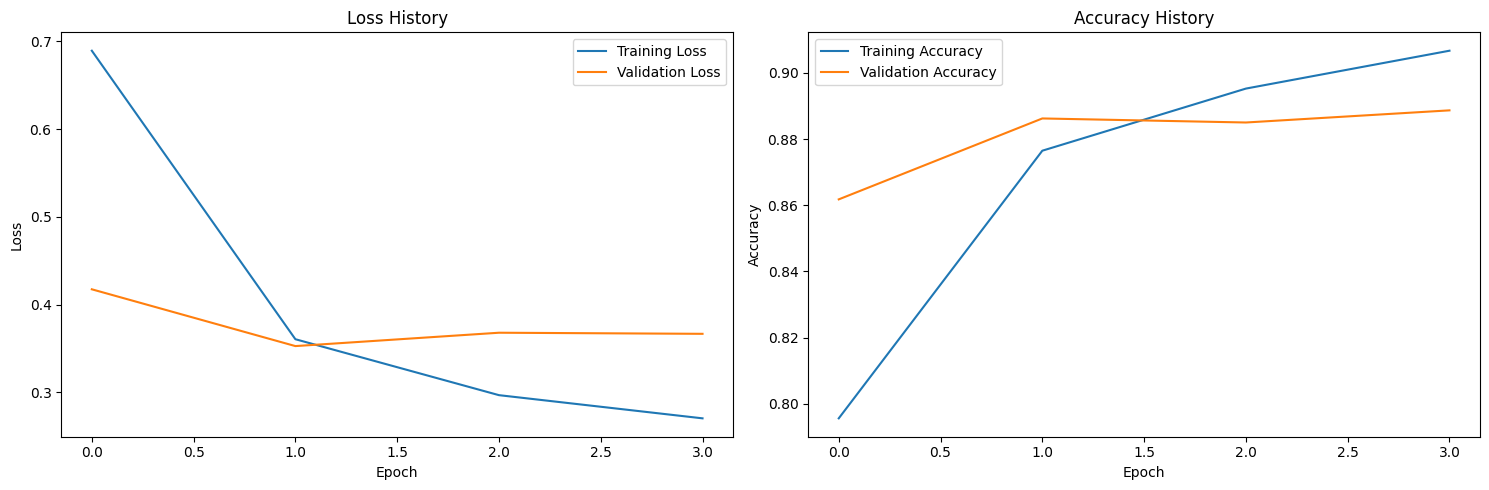

In [ ]:
# Plot nilai loss dan akurasi pada setiap epoch
# Plot Loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
skill = model.evaluate(test_generator)

127/127 [==============================] - 951s 8s/step - loss: 0.2337 - accuracy: 0.9175


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [ ]:
# Evaluasi model pada data pengujian dan hitung confusion matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

127/127 [==============================] - 274s 2s/step


In [ ]:
# Menampilkan daftar kelas atau label gambar
train_generator.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshcucumber': 2,
 'freshokra': 3,
 'freshpatato': 4,
 'freshtamto': 5,
 'rottenapples': 6,
 'rottenbanana': 7,
 'rottencucumber': 8,
 'rottenokra': 9,
 'rottenpatato': 10,
 'rottentamto': 11}

In [ ]:
import pandas as pd

# Membuat tabel confusion matrix
class_names = list(test_generator.class_indices.keys())
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Menampilkan tabel confusion matrix
print(cm_df)

                freshapples  freshbanana  freshcucumber  freshokra  \
freshapples             393            0              0          0   
freshbanana               0          511              0          0   
freshcucumber             0            1            257          6   
freshokra                 0            0             37        313   
freshpatato               0            0             41          0   
freshtamto                1            0              1          0   
rottenapples              5            0              0          0   
rottenbanana              0            0              0          0   
rottencucumber            0            0             16          2   
rottenokra                0            0              6         35   
rottenpatato              0            0              3          2   
rottentamto               0            0              1          0   

                freshpatato  freshtamto  rottenapples  rottenbanana  \
freshapples       

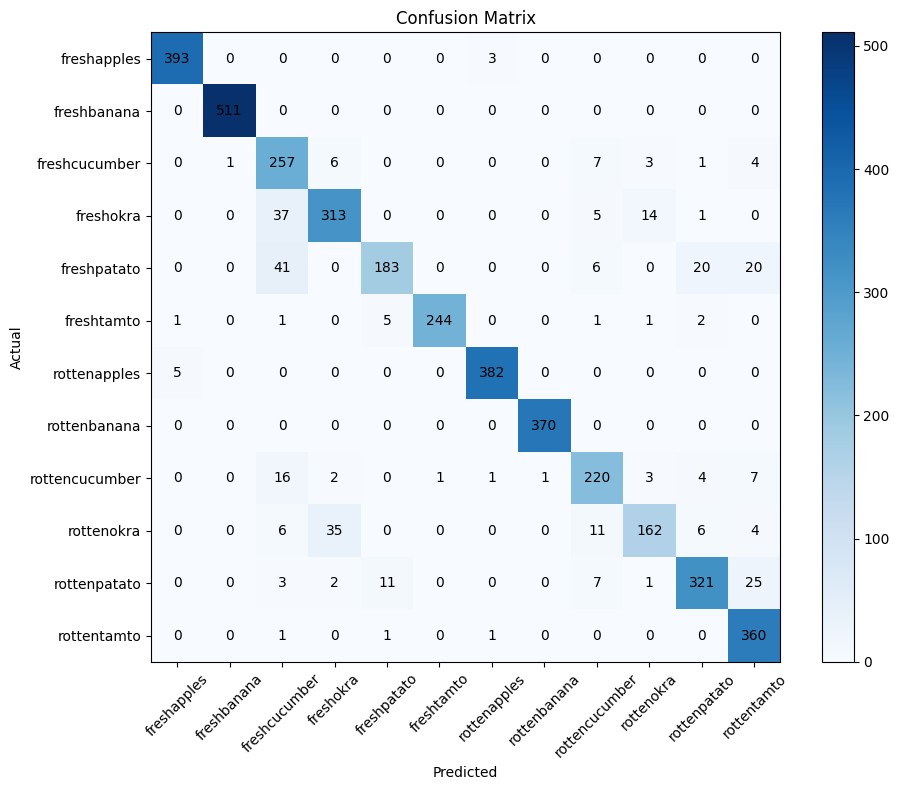

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already defined `cm_df` and `class_names` as shown in your code

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm_df, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations for each cell in the confusion matrix
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(cm_df.iloc[i, j]), horizontalalignment="center", verticalalignment="center")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi model pada data pengujian dan hitung confusion matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

# Menghitung nilai akurasi, presisi, recall, dan F1-score
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Menampilkan hasil evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

127/127 [==============================] - 331s 3s/step
Accuracy: 0.9175
Precision: 0.9222
Recall: 0.9175
F1 Score: 0.9168


In [ ]:
model.save('/content/drive/MyDrive/model_comvis.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
import numpy as np

# Load model dari file h5 dengan input_shape yang sesuai
model_path = '/content/drive/MyDrive/model_comvis.h5'
model = load_model(model_path, compile=False)

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))  # Resize gambar sesuai dengan img_height & img_width
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model.predict(img_array)
    class_index = np.argmax(preds[0])  # Dapatkan indeks kelas dengan nilai prediksi tertinggi
    class_label = get_class_label(class_index)  # Ganti indeks kelas menjadi label kelas

    print("Hasil prediksi:", class_label)

# Fungsi untuk mengonversi indeks kelas menjadi label kelas (misalnya: 0 -> 'kelas_1', 1 -> 'kelas_2', dst.)
def get_class_label(index):
    # Ganti dengan label kelas sesuai dengan indeks kelas
    class_labels = ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshpatato', 'freshtamto', 'rottenapples',
                    'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenpatato', 'rottentamto']
    return class_labels[index]

# Masukkan path dari gambar yang ingin Anda prediksi
image_path = '/content/drive/MyDrive/test/freshapples/a_f006.png'
predict_image(image_path)


1/1 [==============================] - 1s 1s/step
Hasil prediksi: freshapples


1/1 [==============================] - 1s 1s/step


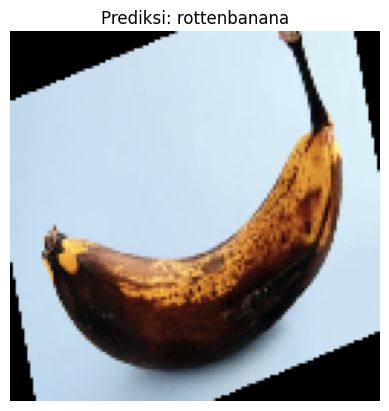

In [ ]:
# Import library yang diperlukan
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# Load model dari file h5 dengan input_shape yang sesuai
model_path = '/content/drive/MyDrive/model_comvis.h5'
model = load_model(model_path, compile=False)

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))  # Resize gambar sesuai dengan img_height & img_width
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model.predict(img_array)
    class_index = np.argmax(preds[0])  # Dapatkan indeks kelas dengan nilai prediksi tertinggi
    class_label = get_class_label(class_index)  # Ganti indeks kelas menjadi label kelas

    # Menampilkan gambar yang diprediksi
    plt.imshow(img)
    plt.title(f"Prediksi: {class_label}")
    plt.axis('off')
    plt.show()

# Fungsi untuk mengonversi indeks kelas menjadi label kelas (misalnya: 0 -> 'kelas_1', 1 -> 'kelas_2', dst.)
def get_class_label(index):
    # Ganti dengan label kelas sesuai dengan indeks kelas
    class_labels = ['freshapples', 'freshbanana', 'freshcucumber', 'freshokra', 'freshpatato', 'freshtamto', 'rottenapples',
                    'rottenbanana', 'rottencucumber', 'rottenokra', 'rottenpatato', 'rottentamto']
    return class_labels[index]

# Masukkan path dari gambar yang ingin Anda prediksi
image_path = '/content/drive/MyDrive/test/rottenbanana/b_r005.png'
predict_image(image_path)


In [ ]:
model.save('/content/drive/MyDrive/model_comvis_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
